In [1]:
import matplotlib.pyplot as plt
import data
import utils
%load_ext wurlitzer

In [9]:
# ds = data.MNIST()
ds = data.PenDigits()
# ds = data.COIL20()
# ds = data.COIL100()
# ds = data.ScRNA()
# ds = data.Shuttle()

Ys = {}

In [10]:
import ncvis

vis = ncvis.NCVis(n_neighbors=15, M=16, ef_construction=200, n_init_epochs=10, n_epochs=50, min_dist=0.4, n_threads=-1)

In [11]:
%%time
import numpy as np
Ys['ncvis'] = vis.fit_transform(ds.X)

CPU times: user 7.68 s, sys: 150 ms, total: 7.83 s
Wall time: 1.2 s


In [12]:
from umap import UMAP

umap = UMAP(n_neighbors=15, min_dist=0.4, metric='euclidean', n_epochs=60)

In [14]:
%%capture --no-stdout
%%time
Ys['umap'] = umap.fit_transform(ds.X)

CPU times: user 5.17 s, sys: 86.4 ms, total: 5.26 s
Wall time: 3.43 s


In [13]:
from sklearn.manifold import TSNE

tsne = TSNE()

In [14]:
%%time
Ys['tsne'] = tsne.fit_transform(ds.X)

CPU times: user 31.6 s, sys: 56.9 ms, total: 31.6 s
Wall time: 28.9 s


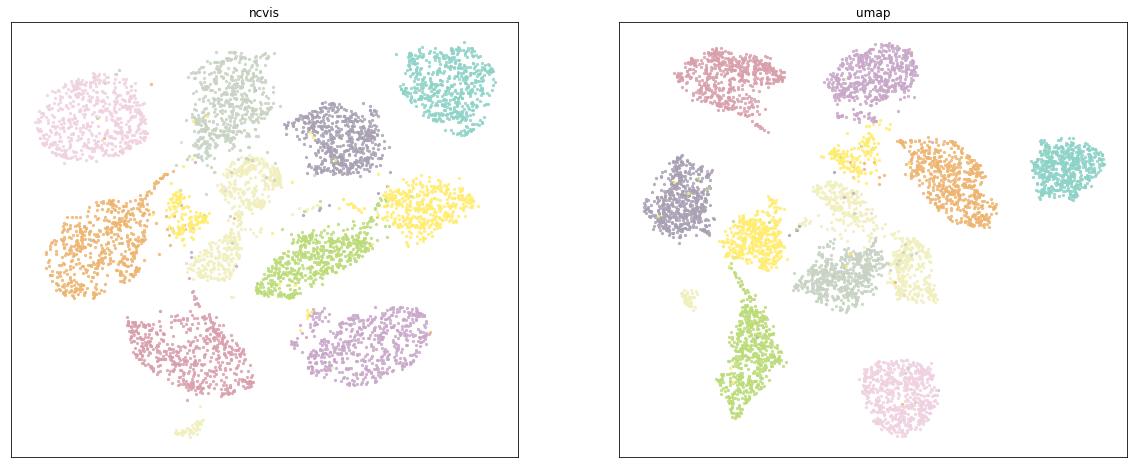

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax = ax.ravel()

for k, (name, Y) in enumerate(Ys.items()):
    ax[k].set_title(name)
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    utils.scatter_classes(Y, ds.y, ax[k], marker='.', s=20, alpha=0.8,
                          show_labels=False)
plt.show()